TP2
========

**Objectif**: 

utiliser Xcas (pour le calcul symbolique) et Python pour calculer:

* la **transformée de Fourier** continue (TF, ou FT en anglais) d'un signal non-périodique.
* la transformée de Fourier **discrète**, TFD (ou DFT, Discrete Fourier Transform).
* comparer les deux.

Le cours associé est le CM2, "Transformation de Fourier".

**Durée:** 4h

**Instructions générales:**
    
* téléchargez le fichier notebook `.ipynb` à l'adresse [www](https://gitlab.com/hazaa/oml3/-/blob/main/book/TP2-TF-DFT.ipynb)
* remettez votre travail sur eprel.
* un fichier nommé: ```TP2-NOM.ipynb```
* Si vous cherchez de l'**aide** sur une fonction Python/Numpy depuis Jupyter Notebook
   *  ouvrez une cellule et taper par exemple `?np.sin`, puis validez.
   *  sinon cherchez dans sur la documentation générale [Python](https://docs.python.org/) ou [Numpy](https://numpy.org/doc/stable/reference/)
   * tout en bas du notebook, vous trouverez un aide-mémoire des fonctions numpy utiles.

In [1]:
# code à executer en début de TP
import numpy as np
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pylab as plt
from scipy.io import wavfile
plt.rc('font',size=18)

0 Introduction à la vectorisation des calculs sous Python
----------

Sous Python, Matlab, etc... on fait souvent:
    
* du calcul numérique (plutôt que symbolique), 
* sur des vecteurs.

**Exemple**: pour calculer le carré des premiers entiers  :

1. on définit un vecteur
  * `v = np.arange(10)`, c'est à dire un tableau d'entiers de $0$ jusqu'à $9$, de taille 10.
  * ou `v=np.linspace(0,1,10)`, un tableau de réels de $0$ jusqu'à $1$, de taille 10.
1. on applique une fonction **"vectorisée"** sur ce tableau: `np.power(v,2)`, c'est-à-dire une fonction qui va agir terme-à-terme sur **chacun** des éléments du tableau.
        
Cette manière de faire permet d'éviter d'écrire des **boucles**. La librairie numpy (`np`) contient de nombreuses fonctions vectorisées, qu'on appelle aussi `ufunc`.

On obtient donc:        

In [35]:
v = np.arange(5)
print(v)
np.power(v,2)

[0 1 2 3 4]


array([ 0,  1,  4,  9, 16])

Une autre manière de faire est tout simplement de multiplier `v` par lui-même, ce qui est un cas particulier de **produit scalaire**:

In [37]:
v*v

array([ 0,  1,  4,  9, 16])

**Q1**:

* utiliser la fonction `np.linspace` pour construire un tableau de réels `t` de longueur 100, prenant ses valeurs entre 0 et $2 \pi$.
* calculer la taille du tableau avec la fonction `shape` (voir [Annexes](#Annexes) ci-dessous, si besoin)
* calculer un tableau `x` constituté terme à terme des cosinus des éléments de `t`, en utilisant une fonction vectorisée Numpy. Tracer avec `plt.plot(t,x)`
* calculez le produit terme à terme de $\cos^2(x)+\sin^2(x)$ pour tout élément du tableau `t` et comparer à la valeur théorique. Tracer avec `plt.plot(t,x)`

1 Transformée de Fourier
--------

Soient deux signaux à temps **continu** : 

* $x_0(t)=A\sin(2\pi f_0 t)$
* $x_1(t)$ est un sinus fenêtré par une fonction gaussienne:   
$$
\begin{align}
    x_1(t) &= A\sin(2\pi f_0 t)  ~e^{-\frac{(t-t_0)^2}{2c^2}}  \\
\end{align}
$$    
    
    
Pour les applications numériques on prendra:

$$
\begin{align}
    A &=1 \\
    c&=0.3 \\
    t_0&=0\\
    f_0&=110
\end{align}
$$ 



Ci-dessous on va tracer le graphe de $x_1(t)$ sous Python grâce aux fonctions vectorisées.

In [2]:
# x0(t)
# signal sinusoïdal échantillonné

A=1
Fs = 2e3; # fréquence d'échantillonnage
f0 = 110; # fréquence du sinus (Hz)
omega0 = f0*2*np.pi; # pulsation (rad/s)
# Discretize
tLims = np.array([-2 ,2]);                                  # limite de l'intervalle temporel considéré
N = np.round(Fs*(tLims[1]-tLims[0]));
t = np.arange(start=0,stop=N/Fs-1/Fs,step=1/Fs) + tLims[0]; # base de temps
x0 = A*np.sin(omega0*t)

In [4]:
# x1(t)

def sinGauss():
    # Sample a Gaussian-modulated sinusoid
    Fs = 2e3; # Audio sample rate
    # Gaussian-modulated sine data
    A = 1; # Amplitude
    f0 = 110; # Carrier frequency (Hz)
    c = 0.3; # Gaussian "width"
    t0 = 0; # Center position (s)
    omega0 = f0*2*np.pi; # Angular frequency (rad/s)
    # Discretize
    tLims = np.array([-2 ,2]);
    N = np.round(Fs*(tLims[1]-tLims[0]));
    t = np.arange(start=0,stop=N/Fs-1/Fs,step=1/Fs) + tLims[0];
    # ICI LA DEFINITION DE LA FONCTION
    y = A*np.sin(omega0*t)*np.exp(-(t-t0)**2/(2*c**2));
    return t,y

Puis on appelle cette fonction:

In [5]:
t,x1=sinGauss()

Attention, `t` et `x` sont des **tableaux** de flottants. Ci-dessous les 10 premières valeurs du tableau:

In [35]:
x1[0:10]

array([0.        , 0.00197524, 0.00373762, 0.00507516, 0.00582404,
       0.00588861, 0.00525358, 0.00398667, 0.00223153, 0.00019146])

Enfin on trace $x_0(t)$:

(0.99, 1.01)

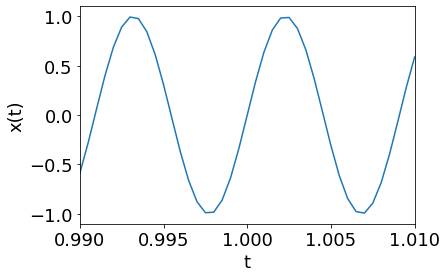

In [22]:
plt.plot(t,x0)
plt.xlabel('t')
plt.ylabel('x_0(t)')
plt.xlim([1.0-0.01,1.0+0.01])

**Q1**:
* tracer le graphe $x_1(t)$ pour $t\in[-2;2]$. 
* idem, en zoomant jusqu'à observer les oscillations du sinus.

**Q2**:
  
  
* à la main: calculer la TF des signaux $x_0(t)$ et $x_1(t)$ ci-dessus en utilisant les formules ci-dessous.


Transformées de Fourier utiles:

$$
\begin{align}
    e^{-\alpha t^{2}}  &\stackrel{TF}{\longrightarrow}  \sqrt{ \frac{\pi }{\alpha }}\cdot e^{-{\frac{(\pi f )^{2}}{\alpha }}} \\
    x(t)\sin(at) &\stackrel{TF}{\longrightarrow} \frac{{\hat {x}}\left(f -{\frac {a}{2\pi }}\right)-{\hat {x}}\left(f +{\frac {a}{2\pi }}\right)}{2i} \\
\end{align}
$$ 
où $\hat {x}(f)=TF[x(t)](f)$ 


**Q3**:

* tracer à la main le graphe de la partie réelle de la TF, en fonction de la fréquence; idem avec la partie imaginaire.
* tracer avec Python le graphe de $TF(x_1(t))(f)$ en vous aidant du code à trous ci-dessous:


In [ ]:
# calcule
c=0.3
alpha = ???
f0= ???
f= np.linspace(-2*f0,2*f0,1000)
TF_x1 = np.sqrt(2*np.pi*c**2)/(2*1j)*(  np.exp( -2*c**2 *(np.pi*(f-f0)**2)) - ????????? )        

# affichage
fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].plot(f,TF_x1.real)
ax[0].set_ylabel('Re(TF)')
ax[1].plot(f,TF_x1.imag)
ax[1].set_ylabel('Im(TFD)')  

2 Transformée de Fourier discrète (TFD)
-----

### a) Définition et calcul de la TFD

La TFD opère uniquement sur des signaux à temps **discret**. Elle permet d'approximer la TF, sur un ordinateur.



  
Le **signal** mesuré, noté $x[n]$, est un **tableau** de réels de longueur $N$, avec $0\leq n < N$.

Les **coefficients de la TFD** sont notés $X_k$, avec $0\leq k < N$.

$$
\begin{align}
    X_k &= \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-jk\frac{2\pi}{N}  n  }\\
\end{align}
$$ 




On peut **comparer** ceci avec l'écriture complexe des coefficients de la DSF (Décomposition en série de Fourier) vue au cours du premier amphi (révisions):

$$
\begin{eqnarray}
c_k &=& \frac{1}{T} \int_{[T]} x(t) e^{-jk \frac{2\pi}{T} t} dt 
\end{eqnarray}
$$

On voit que:

* l'intégrale $\int$ dans la DSF devient une somme $\sum$ dans la TFD, car on est à temps discret.
* $x(t)$ dans la DSF devient $x[n]$. 
* $k$ joue le même rôle: quand il augmente, la fréquence associée augmente.

**Q1**: au sujet de la comparaison entre $c_k$ et $X_k$, remplir le texte à trous ci-dessous. 

* dans le terme exponentiel: 
  * $t$ dans le coefficient complexe $c_k$ DSF devient **???** dans le coefficient $X_k$ TFD.
  * $T$ dans le coefficient complexe $c_k$ DSF devient **???** dans le coefficient $X_k$ TFD.

    

On va maintenant utiliser les fonctions vectorisées pour calculer le vecteur:
    
$
v = [e^{-jk\frac{2\pi}{N} \times 0  }, e^{-jk\frac{2\pi}{N} \times 1  }, \ldots, e^{-jk\frac{2\pi}{N} \times (N-1)} ]
$

**Q2**:  compléter le code à trous ci-dessous pour calculer le vecteur $v$, en prenant $k=1$ et $N=128$:


In [ ]:
n = ????? # le tableau [0,...,N-1] 
v = np.exp(-1j*2*np.pi*k*n/N)
plt.plot(n, np.real(v) )
plt.xlabel('n')
plt.ylabel(r'$Re( e^{-j k\frac{2\pi}{N} n}$')

### b) Application aux signaux de la partie 1

Maintenant on va **calculer** les termes $X_k$ de la TFD pour chaque signal $x_0(t)$ vu **dans la partie 1)**.



 Le terme $ \sum_{n=0}^{N-1} x[n] e^{-jk\frac{2\pi}{N}  n  }$ dans $X_k$ s'interprète comme le **produit scalaire** de deux vecteurs:
 
 * le vecteur $[x[0], x[1],\ldots, x[N-1]]$ 
 * le vecteur $[e^{-jk\frac{2\pi}{N} \times 0  }, e^{-jk\frac{2\pi}{N} \times 1  }, \ldots, e^{-jk\frac{2\pi}{N} \times (N-1)} ]$ vu ci-dessus.
 
 
 Pour calculer le produit scalaire sous Python de deux vecteurs ```u``` et ```v```, on va utiliser ```np.sum( u *v)```.

**Q3**: pour le signal $x_0(t)$, compléter le code à trous ci-dessous pour calculer $X_k$, pour tout $k$ tel que $0\leq k < N$ 

Indication: 

* utiliser le produit terme-à-terme entre deux vecteurs, vu en partie 0.    
* utiliser la somme des termes d'un vecteur.

In [ ]:
N = ???.shape[0]                  # la taille du tableau de flottants x
n = np.arange(0,N);           # le tableau [0,...,N-1] 
X = np.zeros(N,dtype='complex') # le tableau [0,...,0] de taille N

# boucles sur les composantes de X, chacune correspond à la fréquence k/N
for k in range(N):
    #calcule la somme et met le résultat dans X[k]
    X[k] = 1/N * ???( ??? * np.exp(-1j*k*(2*np.pi/N)*n) )
    
#affichage
fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].plot(np.real(X))
ax[0].set_ylabel('Re(TFD)')
ax[1].plot(np.imag(X))
ax[1].set_ylabel('Im(TFD)')

**Q4**: pour le signal $x_0(t)$, vérification du résultat ci-dessus: 

* $X$ doit être un tableau de taille $N$, de type complexe: `X=array([0.0166091 +0.00000000e+00j, 0.01660925+1.63453001e-06j, 0.01660971+3.26924452e-06j,...,   0.01660925-1.63450028e-06j]) `
* Vérifiez sa taille avec `X.shape` 
* Vérifiez son type avec `X.dtype`

Il existe en fait une manière plus rapide de calculer la TFD de $X_k$, en utilisant la fonction `fft()`, qui signifie **Fast Fourier Transform**. Voir la documentation [fft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft) pour plus de détail.

ATTENTION: ne pas oublier le paramètre de normalisation ```fft(x, norm='forward')```

Text(0, 0.5, 'Im(TFD)')

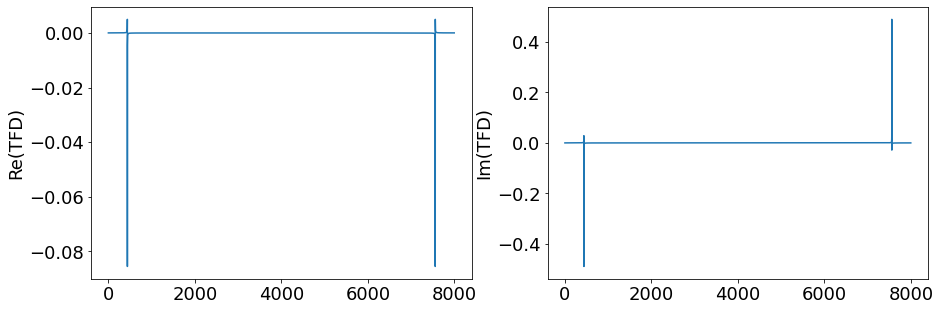

In [7]:
#calcul
X0_fft=fft(x0, norm='forward')

#affichage
fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].plot(np.real(X0_fft))
ax[0].set_ylabel('Re(TFD)')
ax[1].plot(np.imag(X0_fft))
ax[1].set_ylabel('Im(TFD)')

**Q5 BONUS**:A FAIRE EN DERNIER SI TOUT EST FINI: pour le signal $x_1(t)$, comparer les résultats obtenus avec la boucle en Q3 avec la fonction `fft()`. 

Indication: 

* on calcule un nouveau vecteur qui représente la "distance" terme-à-terme entre les deux vecteurs à comparer, et on l'affiche. Sa valeur doit être très faible en chaque point.   
        

### c) Comparaison avec la TF

<h3>c) Comparaison avec la TF</h3>

Pour **comparer les TFD** qu'on vient de calculer ci-dessus avec les **calculs théoriques** faits en partie 1), on a besoin d'une base de l'axe des **fréquences**.

Comment interpréter les **fréquences** dans les TFD ci-dessus ? 



La [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft) de la fonction scipy `fft()` nous dit que si `y=fft(x)`:

>    The frequency term ``f=k/n`` is found at ``y[k]``. At ``y[n/2]`` we reach
>    the Nyquist frequency and wrap around to the negative-frequency terms.


La [documentation](https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms) dit aussi que:


> For N even, the elements `y[1]...y[N/2-1]` contain the positive-frequency terms, and the elements
> `y[N/2]...y[N-1]` contain the negative-frequency terms, in order of
> decreasingly negative frequency. For N odd, the elements
> `y[1]...y[(N-1)/2]` contain the positive-frequency terms, and the
> elements `y[(N+1)/2]...y[N-1]` contain the negative-frequency terms, in order of decreasingly negative frequency.
>
> In case the sequence x is real-valued, the values of `y[n]` for positive
> frequencies is the conjugate of the values `y[n]` for negative
> frequencies (because the spectrum is symmetric). Typically, only the FFT
> corresponding to positive frequencies is plotted

(source : [github](https://github.com/scipy/scipy/blob/main/doc/source/tutorial/fft.rst))

Autrement dit, la première moitié du vecteur `y` concerne les fréquences positives, et la seconde moitié de `y` les fréquences négatives. Mais les deux sont symétriques par rapport au milieu du vecteur, quand on travaille sur un `x` réel.

On va donc utiliser deux fonctions pour représenter correctement la TFD:

* `fftshift` va remettre les fréquences négatives au début du vecteur, et les fréquences positives à la fin du vecteur.
* `fftfreq` va nous donner les fréquences associées à chaque $k$, à partir de la fréquence d'échantillonnage du signal de départ `x`.


**Exemple:**

Text(0, 0.5, 'Im(TFD)')

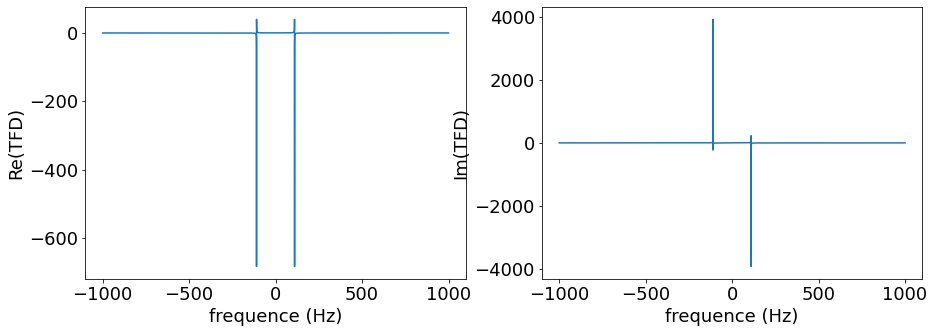

In [5]:
# calcul de la TFD
X0=fft(x0, norm='forward')
X0_shift = fftshift(X0)

# fréquences
Fs=2e3
freq = fftshift(fftfreq(x0.shape[0], 1/Fs))

# affichage
fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].plot(freq, X0_shift.real)                 # ax[0]: premier graphe
ax[0].set_xlabel('frequence (Hz)')
ax[0].set_ylabel('Re(TFD)')

ax[1].plot(freq, X0_shift.imag)                 # ax[1]: second graphe
ax[1].set_xlabel('frequence (Hz)')
ax[1].set_ylabel('Im(TFD)')


On constate que: 
    
* les fréquences de l'axe des abscisses sont réparties symétriquement de part et d'autre de $0$.
* sur les deux graphes il y a des pics à $110 ~Hz$ qui correspond à la fréquence du sinus de $x_0(t)$.



**Q6**: signal sinusoïdal $x_0$: comparaison entre TFD et calcul à la main vu en partie 1) 

* Où se trouvent les pics théoriques ? (en séparant partie réelle et imaginaire et en vérifiant leur signe)
* comparaison entre théorie et TFD (utilisez le modèle de code ci-dessous). Est-ce cohérent ?

In [ ]:
# TFD (déjà calculée ci-dessus)

# affichage
fig,ax = plt.subplots(2,2, figsize=(15,15))     # plusieurs graphes. 2 lignes, 2 colonnes
ax[0,0].plot(freq, np.zeros(freq.shape[0]))           # théorique, partie réelle
ax[0,0].set_xlabel('f(Hz)')
ax[0,0].set_ylabel('Re(TFD)')

ax[0,1].stem([-f0,f0], [1,-1]) # théorique, partie imaginaire
ax[0,1].set_xlabel('f(Hz)')
ax[0,1].set_xlim([np.min(freq),np.max(freq)])
ax[0,1].set_ylabel('Re(TFD)')

ax[1,0].plot(...) # TFD, réelle
ax[1,0].set_xlabel('f(Hz)')
ax[1,0].set_ylabel('Re(TFD)')

ax[1,1].plot(...) # TFD, imaginaire
ax[1,1].set_xlabel('f(Hz)')
ax[1,1].set_ylabel('Im(TFD)')


**Q7**: signal sinusoïdal fenêtré $x_1$: comparaison entre TFD et calcul à la main: 

* rappelez la TF du signal $x_1(t)$ vue en partie 1) en séparant partie réelle et imaginaire. Où se trouvent les pics théoriques ? 
* tracez ces graphes sous Python (utilisez le modèle de code ci-dessous). 
* comparaison entre théorie et TFD (utilisez le modèle de code ci-dessous). Est-ce cohérent ?
* répétez l'opération en zoomant sur le pic (dans les fréquences positives). Exemple: `ax[0].set_xlim([0,x1])`

In [ ]:
# TFD
# ??????

# affichage
fig,ax = plt.subplots(2,2)     # plusieurs graphes. 2 lignes, 2 colonnes
# théorique
ax[0,0].plot(...) # réel
ax[0,1].plot(...) # imaginaire
# TFD
ax[1,0].plot(...) # réel
ax[1,1].plot(...) # imaginaire


### d) Analyse de signaux inconnus

<h3>d) Analyse de signaux inconnus</h3>

On va maintenant travailler sur signaux réels inconnus, échantillonnés à $f_s=16~kHz$.

* Téléchargez le fichier `vi-1483315200_234072_trim.wav` à l'adresse: [www](https://gitlab.com/hazaa/oml3/-/tree/main/book/data)
* Executez le code ci-dessous qui va charger les données.
* les données contiennent les mesures de deux canaux d'acquisition distincts. Elles sont donc stockées dans un tableau de dimension 2. Pour accéder à l'un ou l'autre canal, il faut choisir `x[:,0]` ou `x[:,1]`.

In [28]:
wav_fname = 'data/vi-1483315200_234072_trim.wav'
samplerate, data = wavfile.read(wav_fname)
length = data.shape[0] / samplerate

print(f"number of channels = {data.shape[1]}")
print(f"length = {length}s")

number of channels = 2
length = 1.0s


**Q8**:
* dans le domaine temporel: tracer deux graphes côte à côte de chacun des canaux.
* dans le domaine fréquentiel: pour le premier canal uniquement, tracer le graphe du **module au carré** de la TFD. **Conseil**: 
   * Utiliser une échelle logarithmique pour l'axe des y: `ax[0].semilogy(x,y)` au lieu de la fonction ```plot()```. 
   * pour zoomer (dans les fréquences positives): `ax[0].set_xlim([0,b])`
    

**Q9**:

* interprétez le graphe précédent. A votre avis quelle grandeur observe-t-on ?

**Q10**: 

* le fondamental est-il largement dominant ? Comment cela s'interprète ? 
* comment calculer le Taux de Distorsion Harmonique (TDH) d'après le spectre observé ?

**Q11**: 
    
* répéter Q8 à Q10 avec le second canal.

Annexes
-------

<h3>Commandes Python/Numpy/Scipy utiles</h3>

|  | Explication | Exemple |
|----|----|----|
|  `np.pi` | Constante de valeur $\pi$ | Affiche la valeur de $\cos(\pi)$: `np.cos(np.pi)`| 
|`np.ones(n)`|vecteur composé de 1 |`x=np.ones(10)`|
|`np.zeros(n)`|vecteur composé de 0 |`y=np.zeros(20)`|
|  `np.linspace(a,b,n)` | Calcule $n$ points répartis sur un intervalle $[a,b]$ | `t=np.linspace(0,1,10)`|   
| `np.sin,np.cos,np.exp` | Fonctions vectorisées de base | `A = np.sin(np.pi/2.) +np.exp(-1)` | 
|   | | `x=np.linspace(0,2*np.pi,50); y=np.sin(x)` | 
| carré | `**2`| `x=2; y=x**2` | 
|  | | `x=np.linspace(0,1,50); y=x**2` | 
|  `np.sqrt(x)` | Racine carrée | `np.sqrt(4)`| 
|  `plt.plot(t,x)` | Trace une ligne composée de points $(x_1,y_1), (x_2,y_2), \ldots$| `t = np.linspace (0,1,10); plt.plot(t,t**2)`|  
|`np.real(x)`| partie réelle| `np.real(2+1j)`|
|`np.imag(x)`| partie imaginaire|`np.imag([1,1j])`|
|`np.sum(x)`| somme des éléments de `x`| `np.sum([1,1,1])`|
|`np.abs`| valeur absolue (ou module pour les complexes )| `np.abs(-1); np.abs(1+1j)`|
|`x.shape`| taille d'un tableau crée avec numpy| `x=np.zeros(10); print(x.shape[0])`| 
|`x.dtype`|type des éléments tableau numpy| `x=np.linspace(0,1,10); x.dtype`|
|`ax[0].set_xlabel()`| assigner un titre à l'axe des abscisses| |
|`ax[0].set_xlim([a,b])`| changer la zone de l'axe des abscisses|`fig,ax = plt.subplots(1,2); ax[0].plot(x,y); ax[0].set_xlim([0,1])` |
|`ax[0].semilogy(x,y)`| comme `plot` mais en échelle y logarithmique|`fig,ax = plt.subplots(1,2);ax[0].semilogy(x,y)` |


<h3>Références</h3>

https://fr.mathworks.com/matlabcentral/fileexchange/106725-fourier-analysis

https://docs.scipy.org/doc/scipy/tutorial/fft.html#

oppenheim, willsky

Real signal:
* https://www.researchgate.net/publication/310463352_COOLL_Controlled_OnOff_Loads_Library_a_Public_Dataset_of_High-Sampled_Electrical_Signals_for_Appliance_Identification
* https://coolldataset.github.io/
* https://jack-kelly.com/data/ , https://data.ukedc.rl.ac.uk/browse/edc/efficiency/residential/EnergyConsumption/Domestic/UK-DALE-2017/UK-DALE-2017-16kHz/house_1/2017/wk01, https://www.researchgate.net/publication/261289463_The_UK-DALE_dataset_domestic_appliance-level_electricity_demand_and_whole-house_demand_from_five_UK_homes
* https://github.com/18D070001
            
IO:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.htm     
    
Conversion    :
* sox
* https://github.com/kkroening/ffmpeg-python/tree/master/examples
    

### Cas périodique

In [ ]:
#t = np.linspace(0,1, 2**12)
#sine=np.sin(2*np.pi*128*t)
sine=np.sin(np.pi/6*np.arange(6*20))

# calcul de la TFD
X=fft(sine)
X_shift = fftshift(X)

# fréquences
#Fs=1e3 
#freq = fftshift(fftfreq(sine.shape[0], 1/Fs))
freq = fftshift(fftfreq(sine.shape[0]))

# affichage
fig,ax = plt.subplots(1,2, figsize=(15,5))     # plusieurs graphes. 1 ligne, 2 colonnes
ax[0].plot(freq, X_shift.real) # ax[0]: premier graphe
ax[0].set_xlabel('frequence (Hz)')
ax[0].set_ylabel('Re(TFD)')

ax[1].plot(freq, X_shift.imag) # ax[1]: second graphe
ax[1].set_xlabel('frequence (Hz)')
ax[1].set_ylabel('Im(TFD)')

### TODO

* fréquences: traiter le cas rad per sample, avant rescaling par Fs

**Q1**
calculer à la main la TFD du sin de même freq ?
la calculer avec python
comparer les deux


**Q2** 
comparer la TFD du sin et la TFD du sin fenetré

comparaison avec coef DSF.


TODO: tout refaire avec:

* pseudo guitare $e^{-t} sin$, comme dans `FourierTransform.mlx`
* cool dataset 100kHz

### Reconstruction du signal

Comme avec le théorème de Dirichlet, a partir des coefficients $X_k$ de la TFD, on peut **reconstruire** le signal de départ $x[n]$ avec la formule:

$$
\begin{align}
    x[n]&= \sum_{k=0}^{N-1} X_k e^{i\frac{2\pi}{N} k n  }   \\
\end{align}
$$ 

#### Audio data preprocessing

will copy the first ten seconds:

> sox infile outfile trim 0 10
  

down to 16 bits, since 24 bit is not supported by io.read

> sox vi-1483315200_234072.flac -b 16 vi-1483315200_234072_.wav trim 0 1